In [1]:
def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))
indexer()

'20230407173053218542'

# Understanding backpropagation

In [1]:
import graphviz
import numpy
import math
import sympy
import matplotlib.pyplot

In [2]:
def fx(x):
    return 3*x**2 - 4*x +5

def deriv(x):
    return 6*x-4

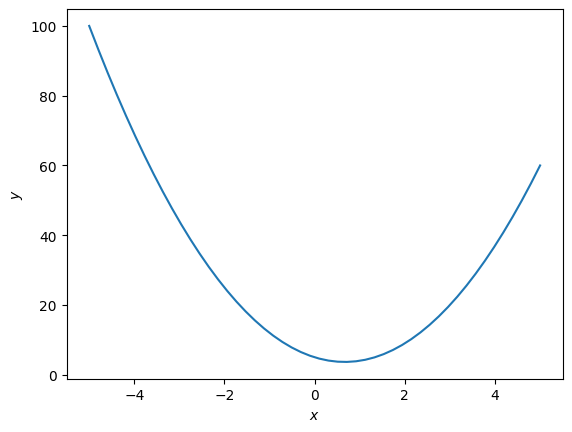

In [3]:
x = numpy.linspace(-5,5,50)
matplotlib.pyplot.plot(x,fx(x))
matplotlib.pyplot.xlabel('$x$')
matplotlib.pyplot.ylabel('$y$')
matplotlib.pyplot.show()

In [5]:
h = 0.001
x = 3.0
fx(x+h)

20.014003000000002

In [7]:
fx(x+h)-fx(x)

0.01400300000000243

In [8]:
(fx(x+h)-fx(x))/h

14.00300000000243

In [9]:
h = 0.001
x = -3.0
(fx(x+h)-fx(x))/h

-21.996999999998934

In [10]:
deriv(x)

-22.0

In [11]:
# elaborate explanation
# given that 
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
d

4.0

In [12]:
h = 0.001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c
a+=h
d2 = a*b+c

print('d1',d1)
print('d2',d2)

d1 4.0
d2 3.997


In [13]:
h = 0.00000000001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c
a+=h
d2 = a*b+c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 3.99999999997
slope -3.000000248221113


In [56]:
class Value:
    def __init__(self,data,_children=(),_op='',label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data, (self,other),'+')
    
    def __mul__(self,other):
        return Value(self.data * other.data, (self,other),'*')

In [57]:
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
d = a*b ; d.label = 'd'
e = d+c ; e.label = 'e'
f = Value(-2.0,label='f')
L = e*f; L.label = 'L'

In [58]:
d._prev

{Value(data=-3.0), Value(data=2.0)}

In [59]:
d._op

'*'

In [60]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':"LR"})
    
    nodes,edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        
        dot.node(name=uid,label="{%s | data %.4f | grad %.4f}"%(n.label,n.data,n.grad),shape="record")
        if n._op:
            dot.node(name=uid+n._op,label=n._op)
            dot.edge(uid+n._op,uid)
            
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
            
    return dot

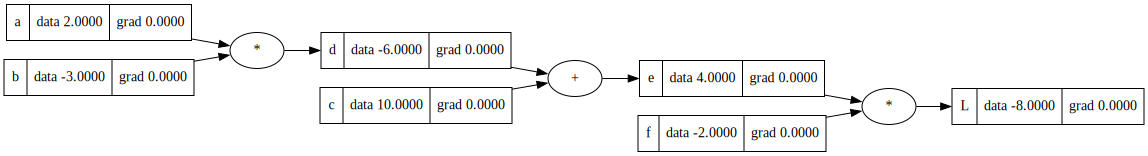

In [61]:
draw_dot(L)

In [70]:
def lol():
    h = 0.001
    
    a = Value(2.0,label='a')
    b = Value(-3.0,label='b')
    c = Value(10.0,label='c')
    e = a*b ; e.label = 'e'
    d = e+c ; d.label = 'd'
    f = Value(-2.0,label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0,label='a')
    b = Value(-3.0,label='b')
    c = Value(10.0,label='c')
    e = a*b ; e.label = 'e'
    d = e+c ; d.label = 'd'
    f = Value(-2.0,label='f')
    L = e*f; L.label = 'L'
    L2 = L.data + h
    
    return (L2-L1)/h

lol()

20000.999999999996

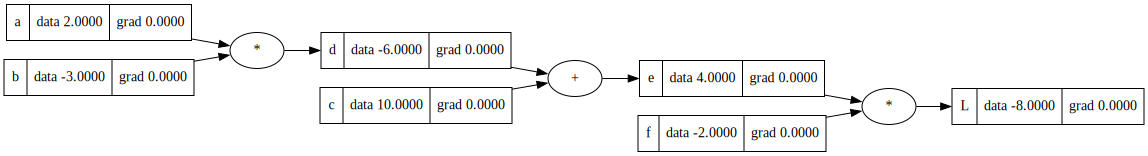

In [66]:
draw_dot(L)